In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Masking, Bidirectional, Dropout
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/DAT/project(4기)/train.csv", encoding="cp949")
df.head(10)

,site,sid,ldate,lrate,llevel,leaktype,0HZ,10HZ,20HZ,30HZ,...,MAX10,MAX11,MAX12,MAX13,MAX14,MAX15,MAX16,MAX17,MAX18,MAX19
0,S-4687025030,S-0359369085120315,20200708,90,256,out,0,18,19,16,...,4690,243,4710,284,4700,324,4670,230,4710,260
1,S-4677025028,S-0359369083968368,20190601,90,542,out,0,4,2,4,...,310,423,300,711,270,412,270,531,290,538
2,S-4673025027,S-0359369085133797,20201028,90,705,out,0,0,0,3,...,240,751,240,897,240,741,240,741,240,562
3,S-4772025022,S-0359369084117593,20200505,90,499,out,0,2,2,2,...,370,549,360,427,370,800,370,552,370,458
4,S-4729010102,S-0359369084010178,20200520,90,423,out,0,3,3,3,...,400,521,400,395,400,461,400,470,400,515
5,S-4280025040,S-0359369085347892,20210108,90,611,out,0,5,5,7,...,300,644,300,504,300,738,300,739,300,793
6,S-4673025027,S-0359369085160188,20210130,90,433,out,0,17,19,19,...,4840,447,240,365,240,464,4870,380,240,486
7,S-4772025022,S-0359369084116777,20200429,90,479,out,0,3,5,5,...,410,630,420,439,410,533,410,455,430,508
8,S-4677025028,S-0359369084263017,20190521,90,234,out,0,6,5,6,...,380,186,360,289,360,243,380,210,350,269
9,S-4677025028,S-0359369084263017,20190321,90,307,out,0,6,6,6,...,350,272,360,319,360,432,290,414,380,276


In [ ]:
val= pd.read_csv("/content/gdrive/MyDrive/DAT/project(4기)/validation.csv", encoding="cp949")
val.head(10)

,site,sid,ldate,lrate,llevel,leaktype,0HZ,10HZ,20HZ,30HZ,...,MAX10,MAX11,MAX12,MAX13,MAX14,MAX15,MAX16,MAX17,MAX18,MAX19
0,S-4677025029,S-0359369081337186,20200519,90,278,out,0,3,4,3,...,440,261,430,218,430,295,440,218,430,183
1,S-4677025029,S-0359369081334381,20200203,90,671,out,0,0,0,0,...,420,717,420,550,420,743,430,617,420,688
2,S-4677025028,S-0359369083374039,20190506,90,474,out,0,3,2,3,...,370,428,390,460,370,389,390,650,380,561
3,S-4677025028,S-0359369084262480,20190704,90,504,out,0,22,24,24,...,310,567,310,472,310,634,320,480,310,532
4,S-4677025028,S-0359369083946018,20190423,90,607,out,0,2,5,5,...,260,415,270,522,280,339,270,474,270,675
5,S-4677025029,S-0359369081379881,20200614,90,497,out,0,9,11,11,...,440,356,450,621,440,513,440,453,440,544
6,S-4772025022,S-0359369084109822,20200514,90,719,out,0,0,0,0,...,370,1023,360,543,370,640,370,659,370,664
7,S-4280025040,S-0359369085814412,20210112,90,380,out,0,3,4,4,...,370,381,380,415,370,373,380,348,390,308
8,S-4784025026,S-0359369085191209,20200624,90,623,out,0,5,5,7,...,250,509,240,759,240,527,240,734,240,631
9,S-4677025028,S-0359369084276407,20191117,90,342,out,0,15,15,15,...,370,283,620,396,600,367,370,326,370,430


In [ ]:
# 특정 sid를 가진 데이터 필터링
filtered_df = df[df['sid'] == 'S-0035514005600295']
filtered_df

,site,sid,ldate,lrate,llevel,leaktype,0HZ,10HZ,20HZ,30HZ,...,MAX10,MAX11,MAX12,MAX13,MAX14,MAX15,MAX16,MAX17,MAX18,MAX19
18277,S-4376025033,S-0035514005600295,20200518,90,818,in,0,3,0,0,...,420,1001,420,1004,410,680,410,773,420,998
19118,S-4376025033,S-0035514005600295,20200428,90,540,in,0,4,2,2,...,420,835,420,717,420,517,420,476,420,649
19528,S-4376025033,S-0035514005600295,20200426,90,593,in,0,2,2,2,...,420,618,420,550,420,654,420,667,420,657
19715,S-4376025033,S-0035514005600295,20200430,90,579,in,0,2,2,2,...,420,660,420,636,420,521,420,628,420,520
19892,S-4376025033,S-0035514005600295,20200429,90,529,in,0,2,2,2,...,420,578,420,676,410,408,420,512,420,329
20029,S-4376025033,S-0035514005600295,20200427,90,511,in,0,4,4,4,...,420,597,420,372,420,648,410,501,420,474
20956,S-4376025033,S-0035514005600295,20200525,90,846,in,0,0,0,0,...,420,913,420,1060,420,884,420,732,420,655
21225,S-4376025033,S-0035514005600295,20200503,90,681,in,0,3,3,3,...,420,611,420,613,420,685,420,688,420,607
21837,S-4376025033,S-0035514005600295,20200515,90,798,in,0,0,0,3,...,420,698,420,1030,420,723,420,713,420,881
22747,S-4376025033,S-0035514005600295,20200424,90,429,in,0,3,3,3,...,420,372,420,430,420,361,420,423,420,416


In [ ]:
# 특정 sid를 가진 데이터 필터링
filtered_df = df[df['sid'] == 'S-0359369085873210']
filtered_df

,site,sid,ldate,lrate,llevel,leaktype,0HZ,10HZ,20HZ,30HZ,...,MAX10,MAX11,MAX12,MAX13,MAX14,MAX15,MAX16,MAX17,MAX18,MAX19
36058,S-4793025022,S-0359369085873210,20210123,90,779,other,0,0,0,0,...,250,935,250,740,250,1093,250,808,250,111
36482,S-4793025022,S-0359369085873210,20210108,90,734,other,0,2,2,2,...,280,854,250,783,280,884,280,728,250,640
36741,S-4793025022,S-0359369085873210,20210106,90,882,other,0,3,3,3,...,250,735,250,988,250,933,250,808,250,762
36942,S-4793025022,S-0359369085873210,20210101,90,883,other,0,0,2,0,...,250,998,280,773,280,784,280,964,250,1058
37212,S-4793025022,S-0359369085873210,20210107,90,832,other,0,0,2,2,...,280,824,280,773,280,792,250,969,280,743
37666,S-4793025022,S-0359369085873210,20210119,90,744,other,0,0,0,0,...,250,909,250,715,250,577,250,605,250,935
37693,S-4793025022,S-0359369085873210,20210109,90,603,other,0,2,2,2,...,240,565,280,560,280,627,250,564,250,640
38170,S-4793025022,S-0359369085873210,20210118,90,754,other,0,0,0,3,...,250,794,280,588,250,1034,250,1038,280,647
40372,S-4793025022,S-0359369085873210,20210111,90,592,other,0,2,2,2,...,280,622,250,675,280,735,280,618,280,597
40447,S-4793025022,S-0359369085873210,20210117,90,726,other,0,3,3,3,...,250,848,250,1007,250,524,250,153,240,78


In [ ]:
# ldate를 datetime 형식으로 변환
df['ldate'] = pd.to_datetime(df['ldate'], format='%Y%m%d')

# 변환 결과 확인
print(df['ldate'].head())

0   2020-07-08
1   2019-06-01
2   2020-10-28
3   2020-05-05
4   2020-05-20
Name: ldate, dtype: datetime64[ns]


In [ ]:
df_sorted = df.sort_values(by=['sid', 'ldate']).reset_index(drop=True)
df_sorted

,site,sid,ldate,lrate,llevel,leaktype,0HZ,10HZ,20HZ,30HZ,...,MAX10,MAX11,MAX12,MAX13,MAX14,MAX15,MAX16,MAX17,MAX18,MAX19
0,S-4376025033,S-0035514005600295,2020-04-22,90,559,in,0,2,2,2,...,420,673,420,366,420,711,420,567,420,566
1,S-4376025033,S-0035514005600295,2020-04-23,90,571,in,0,2,2,2,...,420,709,420,580,420,678,420,441,420,691
2,S-4376025033,S-0035514005600295,2020-04-24,90,429,in,0,3,3,3,...,420,372,420,430,420,361,420,423,420,416
3,S-4376025033,S-0035514005600295,2020-04-25,90,454,in,0,4,4,4,...,420,558,420,468,420,450,420,437,420,638
4,S-4376025033,S-0035514005600295,2020-04-26,90,593,in,0,2,2,2,...,420,618,420,550,420,654,420,667,420,657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62559,S-4793025022,S-0359369085873210,2021-01-18,90,754,other,0,0,0,3,...,250,794,280,588,250,1034,250,1038,280,647
62560,S-4793025022,S-0359369085873210,2021-01-19,90,744,other,0,0,0,0,...,250,909,250,715,250,577,250,605,250,935
62561,S-4793025022,S-0359369085873210,2021-01-21,90,799,other,0,0,0,0,...,250,709,250,1040,250,958,250,606,250,1005
62562,S-4793025022,S-0359369085873210,2021-01-22,90,682,other,0,0,3,3,...,250,564,250,605,250,808,280,632,250,797


In [ ]:
# ldate를 datetime 형식으로 변환
val['ldate'] = pd.to_datetime(val['ldate'], format='%Y%m%d')

# 변환 결과 확인
print(val['ldate'].head())

0   2020-05-19
1   2020-02-03
2   2019-05-06
3   2019-07-04
4   2019-04-23
Name: ldate, dtype: datetime64[ns]


In [ ]:
val_sorted = val.sort_values(by=['sid', 'ldate']).reset_index(drop=True)
val_sorted

,site,sid,ldate,lrate,llevel,leaktype,0HZ,10HZ,20HZ,30HZ,...,MAX10,MAX11,MAX12,MAX13,MAX14,MAX15,MAX16,MAX17,MAX18,MAX19
0,S-4376025033,S-0035514005600295,2020-05-13,90,785,in,0,0,0,0,...,420,804,410,649,420,1057,420,675,420,871
1,S-4376025033,S-0035514005600295,2020-05-14,90,780,in,0,3,3,0,...,420,643,420,833,420,847,420,808,420,776
2,S-4376025033,S-0035514005600295,2020-05-20,90,857,in,0,0,0,0,...,420,626,420,949,420,886,420,837,420,801
3,S-4376025033,S-0035514005600295,2020-05-27,90,643,in,0,2,2,2,...,420,800,420,907,420,694,420,646,420,729
4,S-4376025033,S-0035514005600354,2020-05-01,90,374,in,0,3,3,4,...,420,446,420,420,420,307,430,267,420,496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7815,S-4682025024,S-0359369085872386,2021-01-23,90,254,in,0,12,14,15,...,4720,232,4740,298,4740,278,2510,247,4750,234
7816,S-4682025024,S-0359369085872386,2021-01-28,90,484,in,0,10,12,12,...,250,444,250,483,250,512,2500,211,2520,364
7817,S-4793025022,S-0359369085873210,2021-01-12,90,730,other,0,0,3,3,...,250,553,250,683,250,637,250,662,250,162
7818,S-4793025022,S-0359369085873210,2021-01-13,90,636,other,0,2,2,2,...,250,559,280,527,250,884,250,668,250,602


In [ ]:
# HZ로 끝나는 열과 타겟 변수 선택
hz_columns = [col for col in df.columns if col.endswith('HZ')]
target = 'leaktype'

In [ ]:
# 슬라이딩 윈도우 생성 함수
def create_sequences(data, time_steps):
    X, y = [], []
    for i in range(len(data)):  # 모든 데이터에서 슬라이딩 윈도우 생성
        start_idx = max(0, i - time_steps + 1)  # 가능한 데이터만 사용
        sequence = data.iloc[start_idx:i+1][hz_columns].values
        X.append(sequence)
        y.append(data.iloc[i][target])  # 타겟 데이터는 현재 시점
    return X, y  # 리스트로 반환하여 길이가 다른 배열을 허용

# Train 데이터에서 슬라이딩 윈도우 생성
time_steps = 5  # 한 시퀀스의 최대 길이
X_train, y_train = [], []

for sid, group in df_sorted.groupby('sid'):
    group_X, group_y = create_sequences(group, time_steps)
    X_train.extend(group_X)  # 리스트 합치기
    y_train.extend(group_y)

# 리스트 형태 확인
print(f"Train 데이터 (리스트) 길이: {len(X_train)}, 타겟 길이: {len(y_train)}")

# 길이가 다른 시퀀스를 처리하기 위한 변환 예시
X_train = [np.array(x) for x in X_train]  # 리스트 내부를 NumPy 배열로 변환

Train 데이터 (리스트) 길이: 62564, 타겟 길이: 62564


In [ ]:
# Validation 데이터 슬라이딩 윈도우 생성
X_val, y_val = [], []
for sid, group in val_sorted.groupby('sid'):
    group_X, group_y = create_sequences(group, time_steps)
    X_val.extend(group_X)
    y_val.extend(group_y)

print(f"Validation 데이터 X_val: {len(X_val)}, y_val: {len(y_val)}")

Validation 데이터 X_val: 7820, y_val: 7820


In [ ]:
# 데이터 NumPy 배열로 변환
X_train = [np.array(x) for x in X_train]
y_train = np.array(y_train)
X_val = [np.array(x) for x in X_val]
y_val = np.array(y_val)

In [ ]:
# 데이터 상태 확인
print(f"Train 데이터: X_train {len(X_train)} 시퀀스, y_train {len(y_train)}")
print(f"Validation 데이터: X_val {len(X_val)} 시퀀스, y_val {len(y_val)}")

Train 데이터: X_train 62564 시퀀스, y_train 62564
Validation 데이터: X_val 7820 시퀀스, y_val 7820


In [ ]:
def pad_sequences(sequences, max_len, n_features):
    """
    가변 길이 시퀀스를 고정된 길이로 패딩하는 함수
    :param sequences: 시퀀스 리스트 (각 시퀀스는 2차원 배열)
    :param max_len: 고정할 최대 시퀀스 길이
    :param n_features: 특성 개수 (열 개수)
    :return: 패딩된 NumPy 배열 (3차원)
    """
    padded = np.zeros((len(sequences), max_len, n_features))  # 3D 배열 생성
    for i, seq in enumerate(sequences):
        padded[i, -len(seq):, :] = seq  # 뒤쪽 채움, 앞쪽은 0으로 패딩
    return padded

In [ ]:
# 데이터 준비
max_len = max([len(x) for x in X_train + X_val])  # 최대 시퀀스 길이
n_features = X_train[0].shape[1]  # HZ 열의 개수

# 패딩 적용
X_train_padded = pad_sequences(X_train, max_len, n_features)
X_val_padded = pad_sequences(X_val, max_len, n_features)

# 결과 확인
print(f"X_train_padded shape: {X_train_padded.shape}")
print(f"X_val_padded shape: {X_val_padded.shape}")

X_train_padded shape: (62564, 5, 513)
X_val_padded shape: (7820, 5, 513)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder로 문자열 레이블 변환
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # y_train 문자열 → 정수 변환
y_val_encoded = label_encoder.transform(y_val)          # y_val 문자열 → 정수 변환

# 고유 클래스 확인
print(f"클래스 매핑: {dict(enumerate(label_encoder.classes_))}")

클래스 매핑: {0: 'in', 1: 'noise', 2: 'normal', 3: 'other', 4: 'out'}


In [ ]:
from tensorflow.keras.utils import to_categorical

# 원-핫 인코딩
num_classes = len(label_encoder.classes_)  # 클래스 수
y_train_categorical = to_categorical(y_train_encoded, num_classes)
y_val_categorical = to_categorical(y_val_encoded, num_classes)

print(f"y_train_categorical shape: {y_train_categorical.shape}")
print(f"y_val_categorical shape: {y_val_categorical.shape}")

y_train_categorical shape: (62564, 5)
y_val_categorical shape: (7820, 5)


### BI-LSTM

In [ ]:
# 데이터 섞기
indices = np.arange(X_train_padded.shape[0])
np.random.shuffle(indices)
X_train_padded = X_train_padded[indices]
y_train_categorical = y_train_categorical[indices]

In [ ]:
# Bi-LSTM 모델 정의
model2 = Sequential([
    Masking(mask_value=0.0, input_shape=(max_len, n_features)),  # 패딩 무시
    Bidirectional(LSTM(128, return_sequences=True)),  # Bi-LSTM Layer 1
    Dropout(0.2),  # Dropout Layer
    Bidirectional(LSTM(64, return_sequences=False)),  # Bi-LSTM Layer 2
    Dropout(0.2),  # Dropout Layer
    Dense(num_classes, activation='softmax')  # 다중 클래스 출력을 위한 Softmax 활성화
])

# 모델 컴파일
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 구조 확인
model2.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/masking.py:47: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ masking_3 (Masking)                  │ (None, 5, 513)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 5, 256)              │         657,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 5, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 128)                 │         164,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 822,405 (3.14 MB)

 Trainable params: 822,405 (3.14 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 조기 종료 콜백 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# 모델 학습
history2 = model2.fit(
    X_train_padded, y_train_categorical,
    validation_data=(X_val_padded, y_val_categorical),
    epochs=10,  # 에포크 수
    batch_size=32,  # 배치 크기
    callbacks=[early_stopping],  # 조기 종료 콜백
    verbose=1  # 학습 진행 상황 출력
)

Epoch 1/10
1956/1956 ━━━━━━━━━━━━━━━━━━━━ 140s 66ms/step - accuracy: 0.5600 - loss: 1.0686 - val_accuracy: 0.6359 - val_loss: 0.9326
Epoch 2/10
1956/1956 ━━━━━━━━━━━━━━━━━━━━ 141s 66ms/step - accuracy: 0.6272 - loss: 0.8956 - val_accuracy: 0.6444 - val_loss: 0.8596
Epoch 3/10
1956/1956 ━━━━━━━━━━━━━━━━━━━━ 141s 65ms/step - accuracy: 0.6515 - loss: 0.8365 - val_accuracy: 0.6529 - val_loss: 0.8288
Epoch 4/10
1956/1956 ━━━━━━━━━━━━━━━━━━━━ 143s 66ms/step - accuracy: 0.6725 - loss: 0.7901 - val_accuracy: 0.6861 - val_loss: 0.7553
Epoch 5/10
1956/1956 ━━━━━━━━━━━━━━━━━━━━ 147s 68ms/step - accuracy: 0.6917 - loss: 0.7520 - val_accuracy: 0.7101 - val_loss: 0.7090
Epoch 6/10
1956/1956 ━━━━━━━━━━━━━━━━━━━━ 136s 65ms/step - accuracy: 0.7142 - loss: 0.7050 - val_accuracy: 0.7170 - val_loss: 0.6928
Epoch 7/10
1956/1956 ━━━━━━━━━━━━━━━━━━━━ 128s 65ms/step - accuracy: 0.7340 - loss: 0.6526 - val_accuracy: 0.7453 - val_loss: 0.6473
Epoch 8/10
1956/1956 ━━━━━━━━━━━━━━━━━━━━ 128s 65ms/step - accuracy: 

In [ ]:
# 모델 평가
loss2, accuracy2 = model2.evaluate(X_val_padded, y_val_categorical)
print(f"Validation 손실 (Bi-LSTM): {loss2:.4f}, 정확도 (Bi-LSTM): {accuracy2:.4f}")

245/245 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.8203 - loss: 0.4998
Validation 손실 (Bi-LSTM): 0.5956, 정확도 (Bi-LSTM): 0.7691


In [ ]:
# 예측
y_pred2 = model2.predict(X_val_padded)
y_pred_classes2 = np.argmax(y_pred2, axis=1)  # 예측 클래스
y_val_classes2 = np.argmax(y_val_categorical, axis=1)  # 실제 클래스

245/245 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step


In [ ]:
# Classification Report
print("Classification Report (Bi-LSTM):")
print(classification_report(y_val_classes2, y_pred_classes2))

Classification Report (Bi-LSTM):
              precision    recall  f1-score   support

           0       0.65      0.72      0.68      1659
           1       0.78      0.50      0.61       629
           2       0.85      0.98      0.91      2462
           3       0.72      0.46      0.56       878
           4       0.77      0.77      0.77      2192

    accuracy                           0.77      7820
   macro avg       0.76      0.69      0.71      7820
weighted avg       0.77      0.77      0.76      7820



In [ ]:
# Confusion Matrix
conf_matrix2 = confusion_matrix(y_val_classes2, y_pred_classes2)
print("Confusion Matrix (Bi-LSTM):")
print(conf_matrix2)

Confusion Matrix (Bi-LSTM):
[[1201   42  183   52  181]
 [ 126  314   29   42  118]
 [  36    3 2413    0   10]
 [ 193   22   79  403  181]
 [ 299   20  125   65 1683]]


leaktype 별 스펙트럼 분석

In [ ]:
# 주파수 열만 선택
frequency_columns = [col for col in df.columns if "HZ" in col]
frequency_data = df[["leaktype"] + frequency_columns]  # leaktype 포함

In [ ]:
# leaktype별 평균 스펙트럼 계산
grouped_data = frequency_data.groupby("leaktype").mean()

In [ ]:
# 주파수 값 추출
frequencies = [int(col.replace("HZ", "")) for col in frequency_columns]  # '10HZ' -> 10

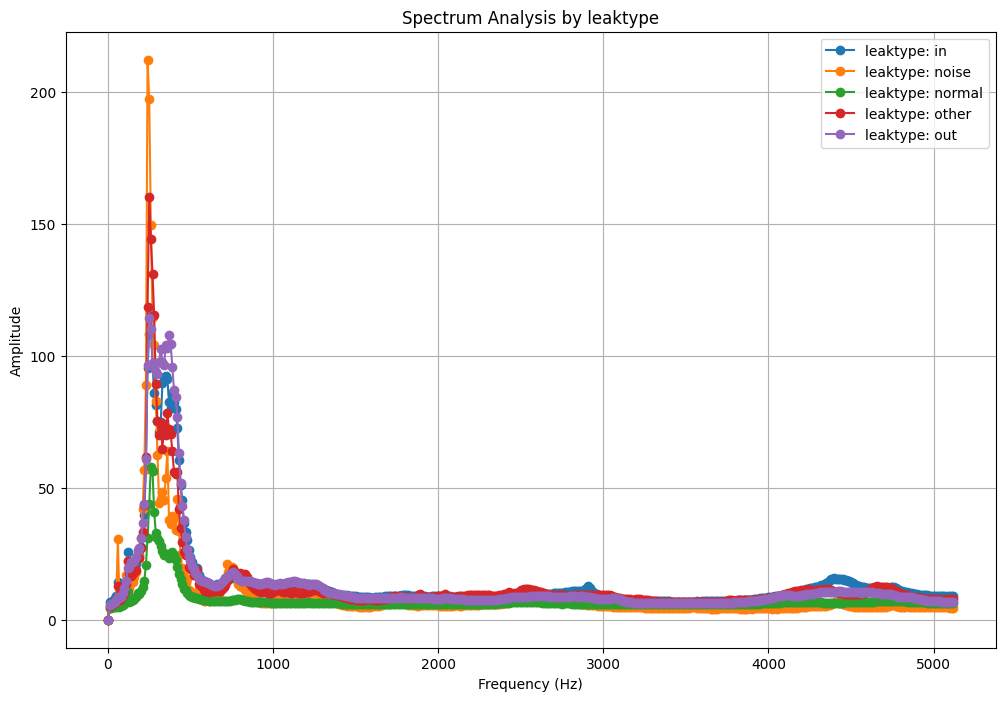

In [ ]:
# 시각화
plt.figure(figsize=(12, 8))

for leaktype, spectrum in grouped_data.iterrows():
    plt.plot(frequencies, spectrum, label=f"leaktype: {leaktype}", marker='o')

plt.title("Spectrum Analysis by leaktype")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()

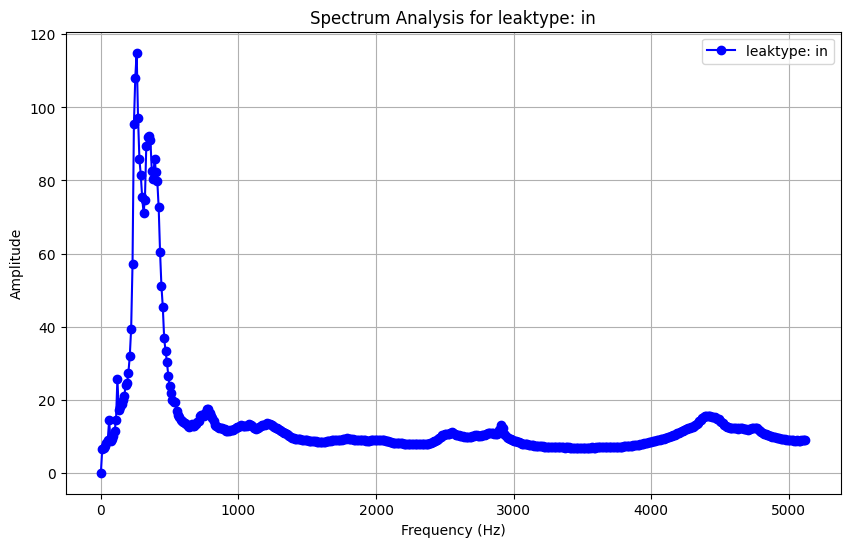

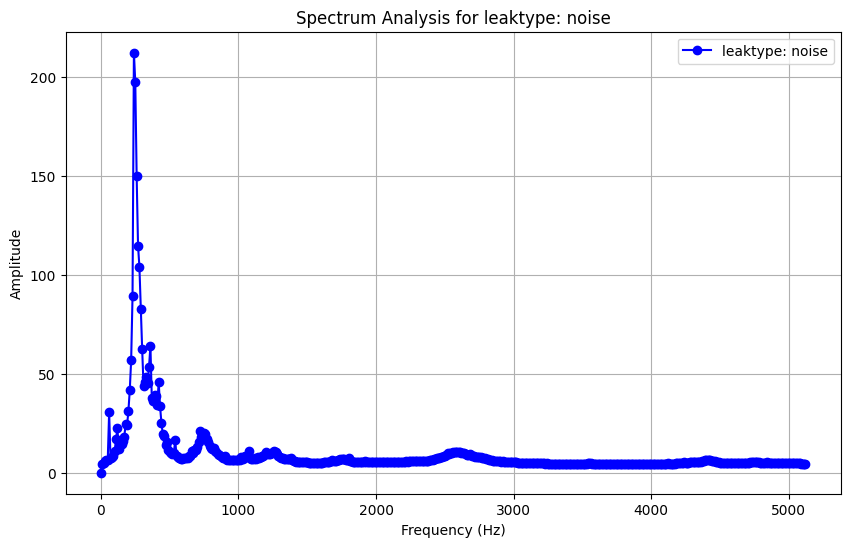

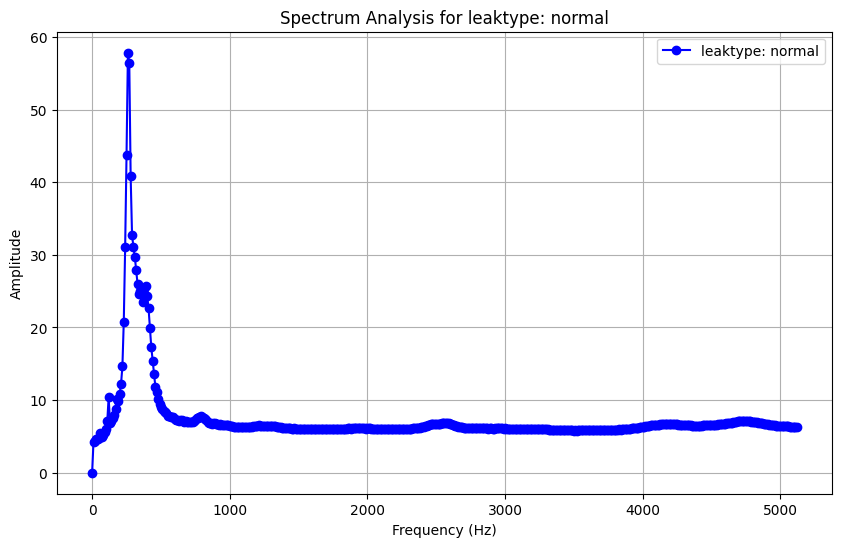

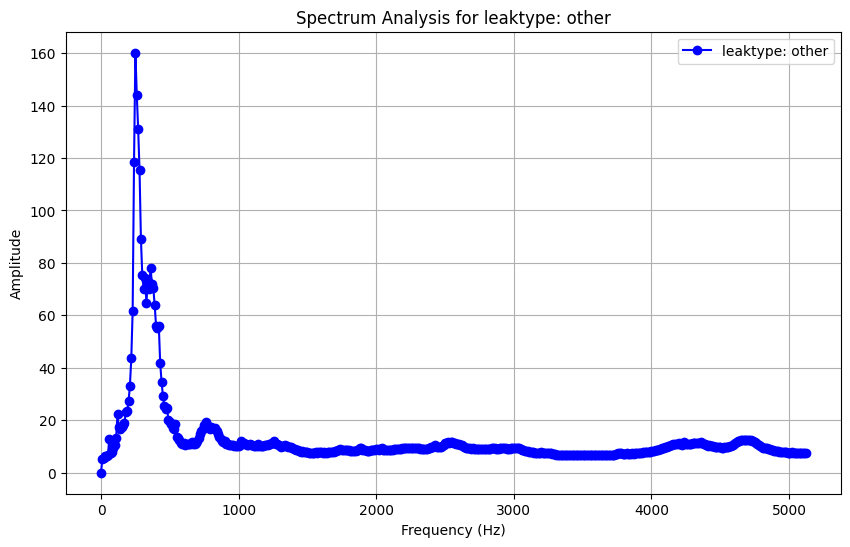

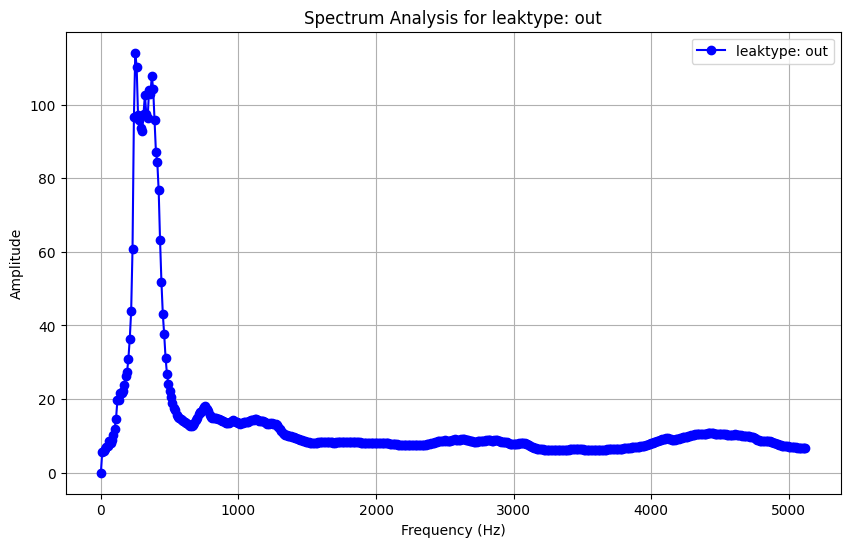

In [ ]:
# 개별 그래프 출력
for leaktype, spectrum in grouped_data.iterrows():
    plt.figure(figsize=(10, 6))
    plt.plot(frequencies, spectrum, label=f"leaktype: {leaktype}", marker='o', color='blue')
    plt.title(f"Spectrum Analysis for leaktype: {leaktype}")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    plt.grid()
    plt.legend()
    plt.show()

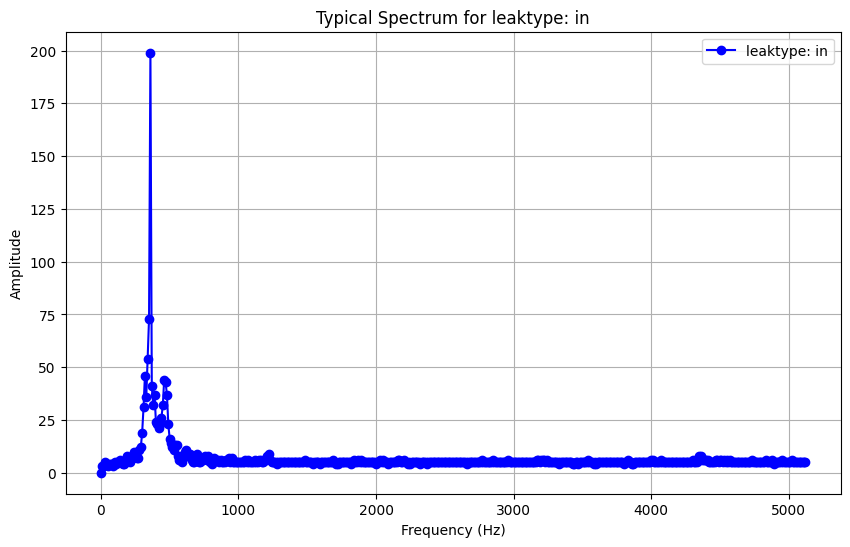

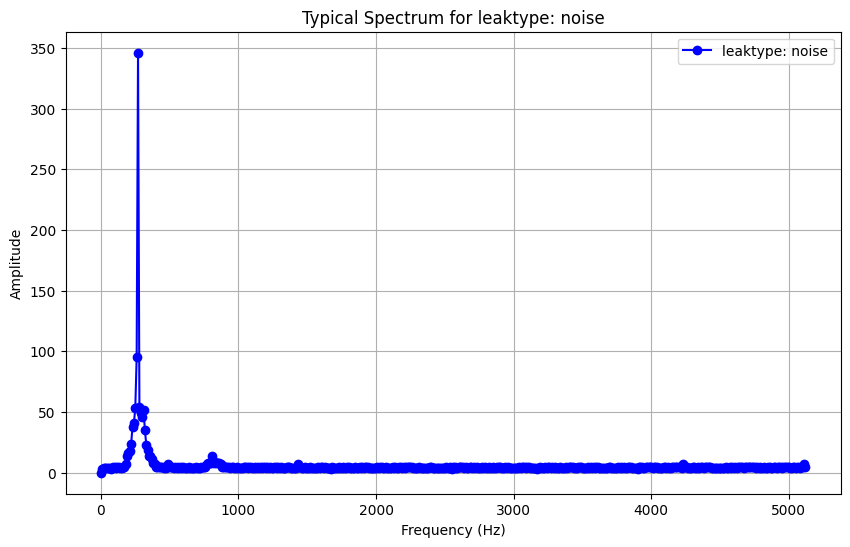

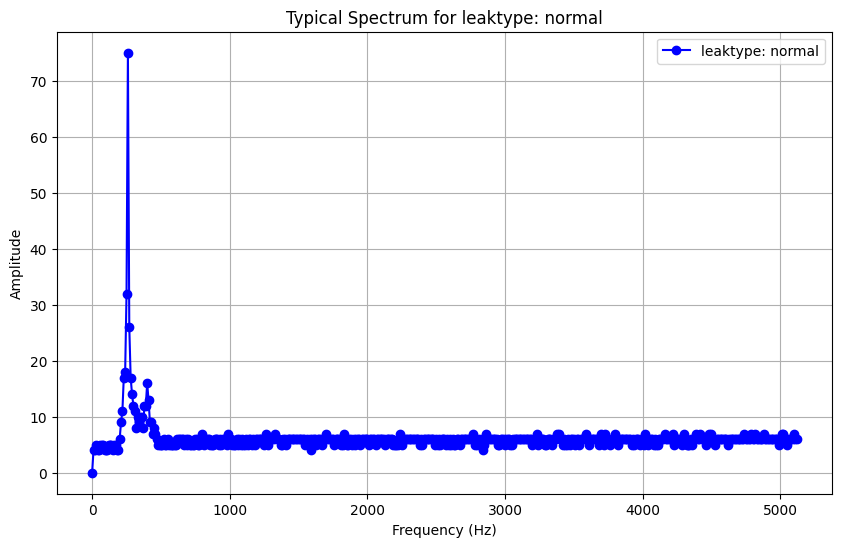

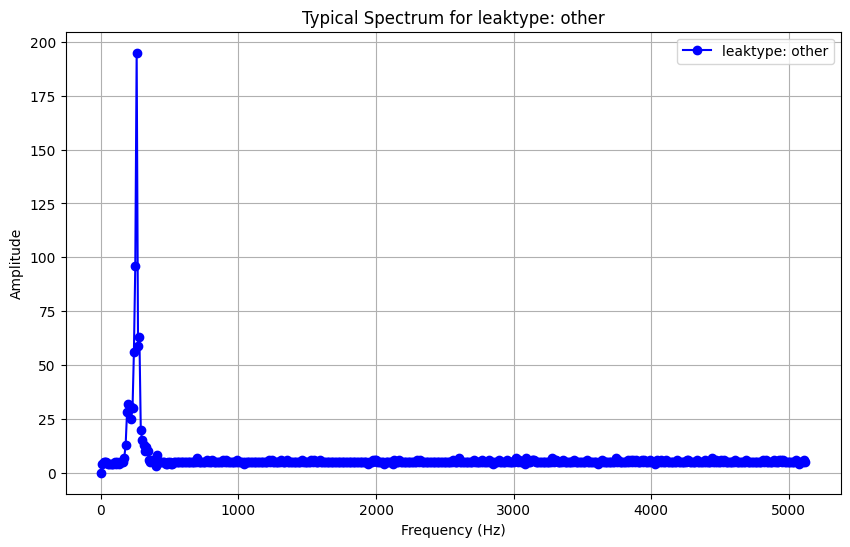

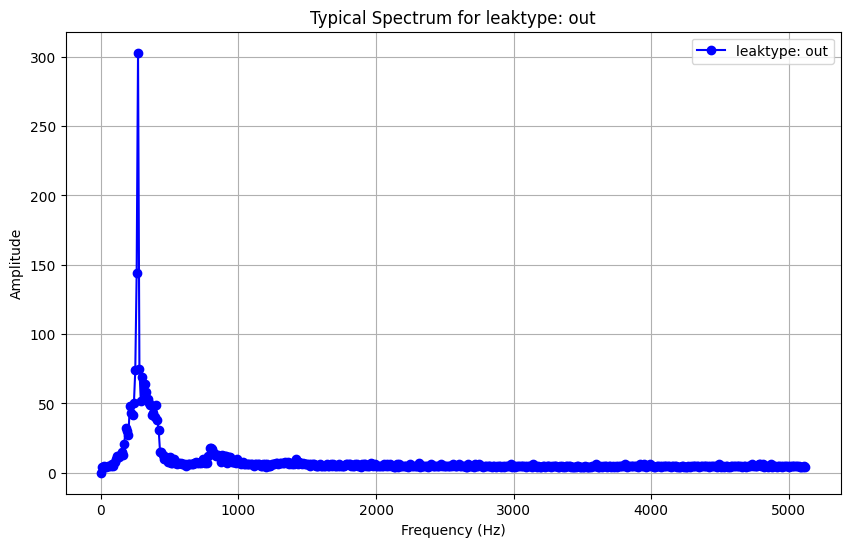

In [ ]:
# 주파수 열만 선택
frequency_columns = [col for col in df.columns if "HZ" in col]
frequency_data = df[["leaktype"] + frequency_columns]  # leaktype 포함

# leaktype별 전형적인 행 선택 (중앙값 기준 또는 임의 기준)
typical_rows = []
for leaktype, group in frequency_data.groupby("leaktype"):
    if len(group) > 0:  # 그룹이 비어 있지 않은 경우만 처리
        # 각 그룹의 주파수 데이터 합계 계산
        group_median = group[frequency_columns].median()
        distance_to_median = (group[frequency_columns] - group_median).abs().sum(axis=1)
        typical_row_idx = distance_to_median.idxmin()  # 중앙값에서 가장 가까운 행의 인덱스
        typical_row = group.loc[typical_row_idx]  # 전형적인 행 선택
        typical_rows.append(typical_row)

# 전형적인 데이터프레임으로 변환
typical_rows_df = pd.DataFrame(typical_rows)

# 주파수 값 추출
frequencies = [int(col.replace("HZ", "")) for col in frequency_columns]  # '10HZ' -> 10

# 개별 그래프 출력
for _, row in typical_rows_df.iterrows():
    leaktype = row["leaktype"]
    amplitudes = row[frequency_columns].values  # 주파수 데이터
    plt.figure(figsize=(10, 6))
    plt.plot(frequencies, amplitudes, label=f"leaktype: {leaktype}", marker='o', color='blue')
    plt.title(f"Typical Spectrum for leaktype: {leaktype}")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    plt.grid()
    plt.legend()
    plt.show()